In [2]:
# Reference: https://jupyterbook.org/interactive/hiding.html
# Use {hide, remove}-{input, output, cell} tags to hiding content

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import display, set_matplotlib_formats
import myst_nb

import plotly
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.default = 'plotly_mimetype+svg'
pio.templates['book'] = go.layout.Template(
    layout=dict(
        margin=dict(l=10, r=10, t=10, b=10),
        autosize=True,
        width=350, height=250,
    )
)
pio.templates.default = 'seaborn+book'

set_matplotlib_formats('svg')
sns.set()
np.set_printoptions(threshold=20, precision=2, suppress=True)
pd.set_option('display.max_rows', 7)
pd.set_option('display.max_columns', 8)
#pd.set_option('precision', 2)
# This option stops scientific notation for pandas
# pd.set_option('display.float_format', '{:.2f}'.format)

def display_df(df, rows=pd.options.display.max_rows,
               cols=pd.options.display.max_columns):
    with pd.option_context('display.max_rows', rows,
                           'display.max_columns', cols):
        display(df)

/var/folders/s2/cw87rxkn0bx03lwlr3n06skh0001l0/T/ipykernel_9267/2318198399.py:29: DeprecationWarning:

`set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`



In [3]:
_clear = ['bingroup']

def _clear_props(traces):
    for trace in traces:
        for prop in _clear:
            if hasattr(trace, prop):
                trace.update({prop: None})

def left_right(left, right, width=700, height=250, **kwargs):
    fig = make_subplots(cols=2, **kwargs)
    fig.update_layout(width=width, height=height)
    
    t1 = list(left.select_traces())
    t2 = list(right.select_traces())
    _clear_props([*t1, *t2])
    fig.add_traces(t1, rows=1, cols=1)
    fig.add_traces(t2, rows=1, cols=2)
    return fig

def margin(fig, **kwargs):
    return fig.update_layout(margin=kwargs)

def to_plotly_text(text):
    return text.strip().replace('\n', '<br>')

## Creating Plots Using ``plotly``

In this section, we cover the basics of the plotly Python package. plotly is the main tool we use in this book to create plots.

The plotly package has several advantages over other plotting libraries. First, it creates interactive plots rather than static images. When you create a plot in plotly, you can pan and zoom to see parts of the plot that are too small to see normally. You can also hover over plot elements, like the symbols in a scatter plot, to see the raw data values. Second, it can save plots using the SVG file format, which means that images appear sharp even when zoomed in. If you're reading this chapter in a PDF or paper copy of the book, we used this feature to render plot images. Finally, it has a simple API for creating basic plots, which helps when you're doing exploratory analysis and want to quickly create many plots.

We'll go over the fundamentals of plotly in this section. We recommend using the official plotly documentation if you encounter something that isn't covered here 1.



## ``Figure`` and ``Trace`` Objects
Every plot in plotly is wrapped in a Figure object. Figure objects keep track of what plots to draw. For instance, a single Figure can draw a scatter plot on the left and a line plot on the right. Figure objects also keep track of the plot layout, which includes the size of the plot, title, legend, and annotations.

Let's look at an example using the dataset of dog breeds.

In [4]:
dogs = pd.read_csv('data/akc.csv').dropna()
dogs

,breed,group,score,longevity,...,size,weight,height,repetition
2,Brittany,sporting,3.54,12.92,...,medium,16.0,48.0,5-15
3,Cairn Terrier,terrier,3.53,13.84,...,small,6.0,25.0,15-25
5,English Cocker Spaniel,sporting,3.33,11.66,...,medium,14.0,41.0,5-15
...,...,...,...,...,...,...,...,...,...
82,Bullmastiff,working,1.64,7.57,...,large,52.0,65.0,40-80
83,Mastiff,working,1.57,6.50,...,large,79.0,76.0,80-100
85,Saint Bernard,working,1.42,7.78,...,large,70.0,67.0,40-80


The ``plotly.express`` module provides a concise API for making plots.

In [5]:
import plotly.express as px

We use ``plotly.express`` below to make a scatter plot of weight against height for the dog breeds.
Notice that the return value from ``.scatter()`` is a ``Figure`` object.

In [7]:
fig = px.scatter(dogs,x='height',y='weight',width=350,height=250)
# fig is a plotly Figure object:
fig.__class__

plotly.graph_objs._figure.Figure

Displaying a Figure object renders it to the screen.

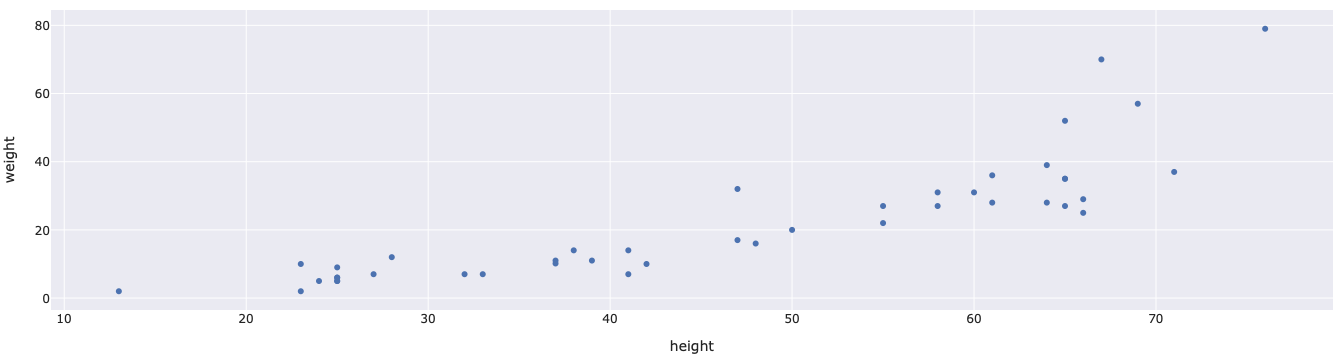

In [8]:
fig

This particular ``Figure`` holds one plot, but ``Figure`` objects can hold any number of plots. Below, we create a facet of three scatter plots.

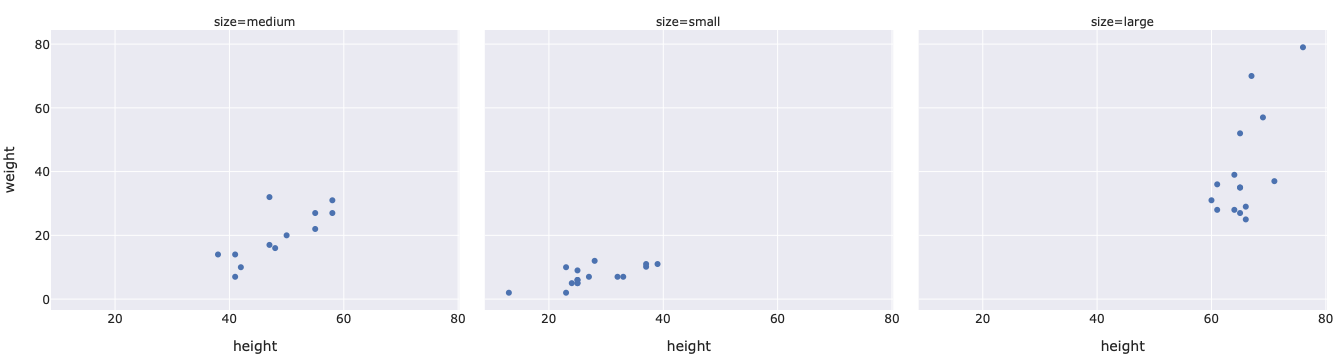

In [10]:
fig = px.scatter(dogs,x='height',y='weight',facet_col='size',width=650,height=250)
fig.update_layout(margin=dict(t=30))
fig